<a href="https://colab.research.google.com/github/Nuzhattttt/braintumor/blob/main/MNa1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from PIL import Image


In [3]:

train_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Training'
test_directory = '/content/gdrive/MyDrive/Amar dataset/dataset/Testing'

In [4]:
image_size = (224, 224)
train_images = []
train_labels = []
test_images = []
test_labels = []

In [5]:
def load_and_preprocess_images(directory, images_list, labels_list):
    for class_name in os.listdir(directory):
        class_directory = os.path.join(directory, class_name)

        for filename in os.listdir(class_directory):
            if filename.endswith('.jpg') or filename.endswith('.png'):
                image_path = os.path.join(class_directory, filename)
                image = Image.open(image_path).convert("RGB")
                image = image.resize(image_size, Image.LANCZOS)
                images_list.append(image)
                labels_list.append(class_name)


In [6]:
load_and_preprocess_images(train_directory, train_images, train_labels)


In [7]:
load_and_preprocess_images(test_directory, test_images, test_labels)


In [8]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [ ]:
# # Assuming your images are in RGB format
# X_train = X_train.reshape(-1, 224, 224, 3)
# X_test = X_test.reshape(-1, 224, 224, 3)


In [ ]:
# image_size = (224, 224)

# # Reshape and resize the images
# X_train = np.array([np.array(img.resize(image_size)) for img in train_images])
# X_test = np.array([np.array(img.resize(image_size)) for img in test_images])

In [9]:
from keras.utils import to_categorical

In [10]:
label_encoder = LabelEncoder()

train_encoded_labels = label_encoder.fit_transform(train_labels)
test_encoded_labels = label_encoder.transform(test_labels)


In [11]:
from keras.utils import to_categorical

In [12]:
# label_encoder = LabelEncoder()
num_classes = 4
y_train = to_categorical(train_encoded_labels, num_classes=num_classes)
y_test = to_categorical(test_encoded_labels, num_classes=num_classes)

# train_encoded_labels = label_encoder.fit_transform(train_labels)
# test_encoded_labels = label_encoder.transform(test_labels)

In [13]:
X_train = np.array([np.array(img) for img in train_images])
y_train = np.array(train_encoded_labels)
X_test = np.array([np.array(img) for img in test_images])
y_test = np.array(test_encoded_labels)


In [14]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (5722, 224, 224, 3)
y_train shape: (5722,)
X_test shape: (1311, 224, 224, 3)
y_test shape: (1311,)


In [15]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
import time
from keras.layers import Activation
from keras.layers import Dropout


In [ ]:
# # model_CNN = tf.keras.Sequential()
# # model_CNN.add(layers.InputLayer(input_shape=(128, 128, 3)))

# # model_CNN.add(layers.Conv2D(32, (5, 5), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(64, (4, 4), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(128, (3, 3), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Conv2D(256, (2, 2), activation='relu'))
# # model_CNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
# # model_CNN.add(layers.BatchNormalization())
# # model_CNN.add(layers.Dropout(0.25))

# # model_CNN.add(layers.Flatten())
# # model_CNN.add(layers.Dense(2048, activation='relu'))
# # model_CNN.add(layers.Dropout(0.25))
# # model_CNN.add(layers.Dense(4, activation='softmax'))

# # optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.99)
# # model_CNN.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
# class VGG16:

#     def build(shape, classes):
#         model_CNN = Sequential()
#         model_CNN.add(Conv2D(input_shape=shape,filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=32,kernel_size=(3,3),padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=64, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
#         model_CNN.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
#         model_CNN.add(Flatten())
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=4096,activation="relu"))
#         model_CNN.add(Dense(units=classes, activation="softmax"))
#         return model_CNN


# build the network
num_classes = 4
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()# build the network
model = Sequential()
print("Input dimensions: ",X_train.shape[1:])

model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

In [ ]:
# # compile the model to use categorical cross-entropy loss function and adadelta optimizer
# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=1,
#                     validation_data=(X_test, y_test))

In [17]:
from tensorflow.keras.utils import to_categorical

In [18]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                    batch_size=64,
                    epochs=50,
                    validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))





Epoch 1/50
90/90 [==============================] - 22s 141ms/step - loss: 7.6939 - accuracy: 0.5178 - val_loss: 0.8733 - val_accuracy: 0.6667
Epoch 2/50
90/90 [==============================] - 11s 126ms/step - loss: 0.7588 - accuracy: 0.6945 - val_loss: 0.6484 - val_accuracy: 0.7498
Epoch 3/50
90/90 [==============================] - 12s 129ms/step - loss: 0.6473 - accuracy: 0.7541 - val_loss: 0.5940 - val_accuracy: 0.7857
Epoch 4/50
90/90 [==============================] - 11s 125ms/step - loss: 0.5572 - accuracy: 0.7789 - val_loss: 0.4990 - val_accuracy: 0.8162
Epoch 5/50
90/90 [==============================] - 11s 127ms/step - loss: 0.4770 - accuracy: 0.8179 - val_loss: 0.4425 - val_accuracy: 0.8139
Epoch 6/50
90/90 [==============================] - 11s 128ms/step - loss: 0.4357 - accuracy: 0.8341 - val_loss: 0.3889 - val_accuracy: 0.8452
Epoch 7/50
90/90 [==============================] - 12s 128ms/step - loss: 0.3982 - accuracy: 0.8429 - val_loss: 0.3484 - val_accuracy: 0.8574

In [19]:
predictions = model.predict(X_test)

41/41 [==============================] - 1s 10ms/step


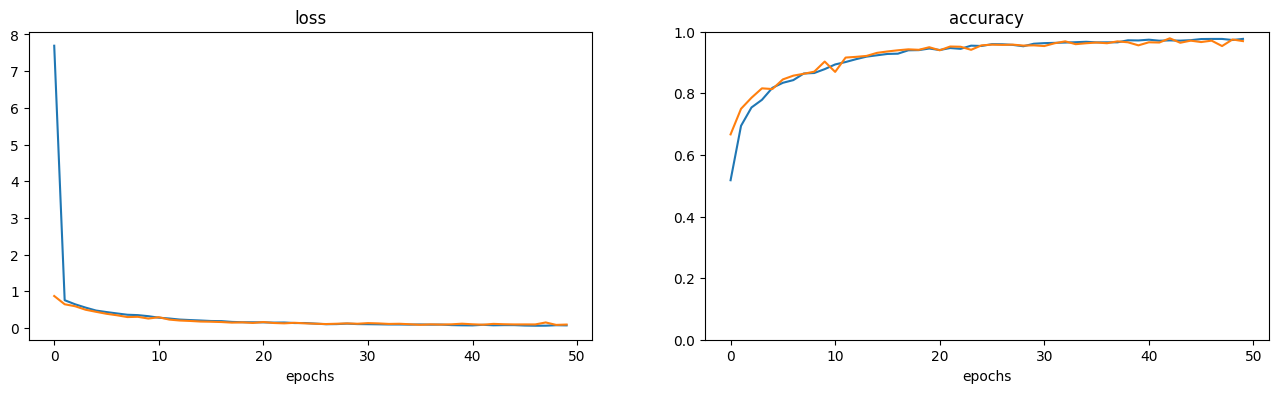

In [20]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["loss"])
ax.plot(history.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history.history["accuracy"])
ax2.plot(history.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [21]:
loss, accuracy = model.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)
print('Test loss:', loss)
print('Test accuracy:', accuracy)


Test loss: 0.09521365910768509
Test accuracy: 0.9694889187812805


In [18]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.mobilenet_v2 import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

Mob = MobileNetV2(weights='imagenet', include_top=True)
Mob.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [19]:
# make a reference to MobileNets's input layer
inp = Mob.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in MobileNets, and make a reference to it
out = new_classification_layer(Mob.layers[-2].output)

# create a new network between inp and out
model_new = Model(inp, out)

In [20]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_new.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_new.layers[-1:]):
    layer.trainable = True

model_new.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_new.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming 'predictions' contains the predicted labels (output from the model)
# Replace this with your actual predictions from the model
predictions = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(test_encoded_labels, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(num_classes))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


In [21]:
from keras.applications.mobilenet_v2 import preprocess_input


In [22]:


X_train_mobilenet = preprocess_input(X_train)
X_test_mobilenet = preprocess_input(X_test)


In [23]:
history2 = model_new.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))


Epoch 1/50
90/90 [==============================] - 25s 135ms/step - loss: 0.7275 - accuracy: 0.7261 - val_loss: 0.6705 - val_accuracy: 0.7544
Epoch 2/50
90/90 [==============================] - 8s 94ms/step - loss: 0.4492 - accuracy: 0.8464 - val_loss: 0.5226 - val_accuracy: 0.8070
Epoch 3/50
90/90 [==============================] - 10s 109ms/step - loss: 0.3752 - accuracy: 0.8745 - val_loss: 0.4652 - val_accuracy: 0.8299
Epoch 4/50
90/90 [==============================] - 9s 95ms/step - loss: 0.3344 - accuracy: 0.8889 - val_loss: 0.4385 - val_accuracy: 0.8398
Epoch 5/50
90/90 [==============================] - 9s 97ms/step - loss: 0.3100 - accuracy: 0.8950 - val_loss: 0.4069 - val_accuracy: 0.8566
Epoch 6/50
90/90 [==============================] - 10s 107ms/step - loss: 0.2870 - accuracy: 0.9016 - val_loss: 0.4005 - val_accuracy: 0.8581
Epoch 7/50
90/90 [==============================] - 9s 96ms/step - loss: 0.2743 - accuracy: 0.9089 - val_loss: 0.3753 - val_accuracy: 0.8703
Epoch 8

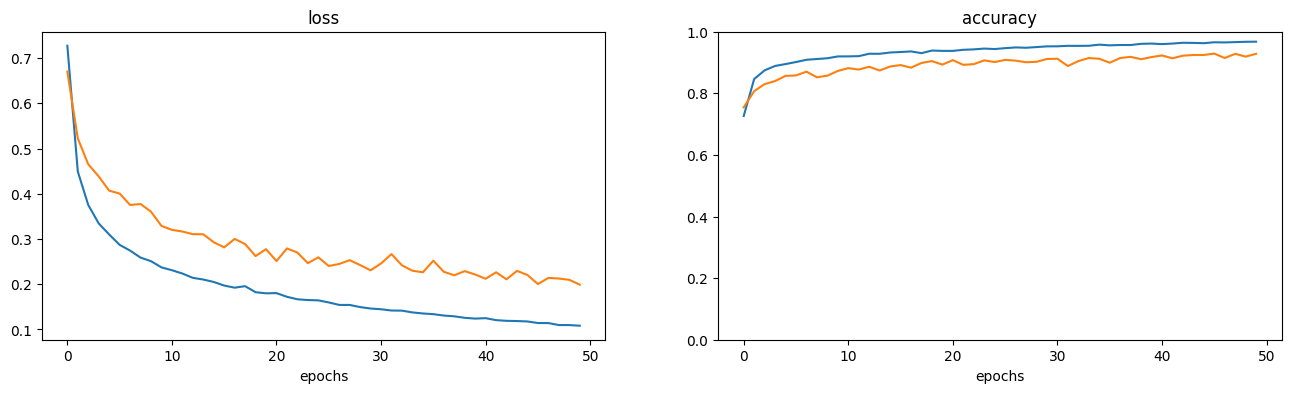

In [24]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history2.history["loss"])
ax.plot(history2.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history2.history["accuracy"])
ax2.plot(history2.history["val_accuracy"])
ax2.set_title("accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [25]:
loss, accuracy = model_new.evaluate(X_test, to_categorical(test_encoded_labels, num_classes=num_classes), verbose=0)

print('Test loss:', loss)
print('Test accuracy:', accuracy)

Test loss: 0.19902624189853668
Test accuracy: 0.9282990097999573


In [26]:
from tensorflow.keras.applications.nasnet import NASNetMobile, preprocess_input
from tensorflow.keras.preprocessing import image
from keras.applications.nasnet import decode_predictions
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

nas = NASNetMobile(weights='imagenet', include_top=True)
nas.summary()

24227760/24227760 [==============================] - 0s 0us/step
Model: "NASNet"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_12 (Activation) 

In [27]:
# make a reference to VGG's input layer
inp = nas.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(nas.layers[-2].output)

# create a new network between inp and out
model_nas = Model(inp, out)

In [28]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_nas.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_nas.layers[-1:]):
    layer.trainable = True

model_nas.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_nas.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 stem_conv1 (Conv2D)         (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 stem_bn1 (BatchNormalizati  (None, 111, 111, 32)         128       ['stem_conv1[0][0]']          
 on)                                                                                              
                                                                                                  
 activation_12 (Activation)  (None, 111, 111, 32)         0         ['stem_bn1[0][0]']      

In [29]:
history3 = model_nas.fit(X_train,to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=50,
                         validation_data=(X_test, to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/50
90/90 [==============================] - 37s 239ms/step - loss: 1.1259 - accuracy: 0.5322 - val_loss: 0.9897 - val_accuracy: 0.6079
Epoch 2/50
90/90 [==============================] - 14s 158ms/step - loss: 0.8752 - accuracy: 0.6697 - val_loss: 0.9090 - val_accuracy: 0.6621
Epoch 3/50
90/90 [==============================] - 14s 158ms/step - loss: 0.8060 - accuracy: 0.7026 - val_loss: 0.8627 - val_accuracy: 0.6720
Epoch 4/50
90/90 [==============================] - 14s 155ms/step - loss: 0.7600 - accuracy: 0.7200 - val_loss: 0.8294 - val_accuracy: 0.6804
Epoch 5/50
90/90 [==============================] - 14s 156ms/step - loss: 0.7274 - accuracy: 0.7337 - val_loss: 0.8170 - val_accuracy: 0.6819
Epoch 6/50
90/90 [==============================] - 14s 157ms/step - loss: 0.7018 - accuracy: 0.7441 - val_loss: 0.7794 - val_accuracy: 0.6979
Epoch 7/50
90/90 [==============================] - 14s 157ms/step - loss: 0.6846 - accuracy: 0.7501 - val_loss: 0.7729 - val_accuracy: 0.6987

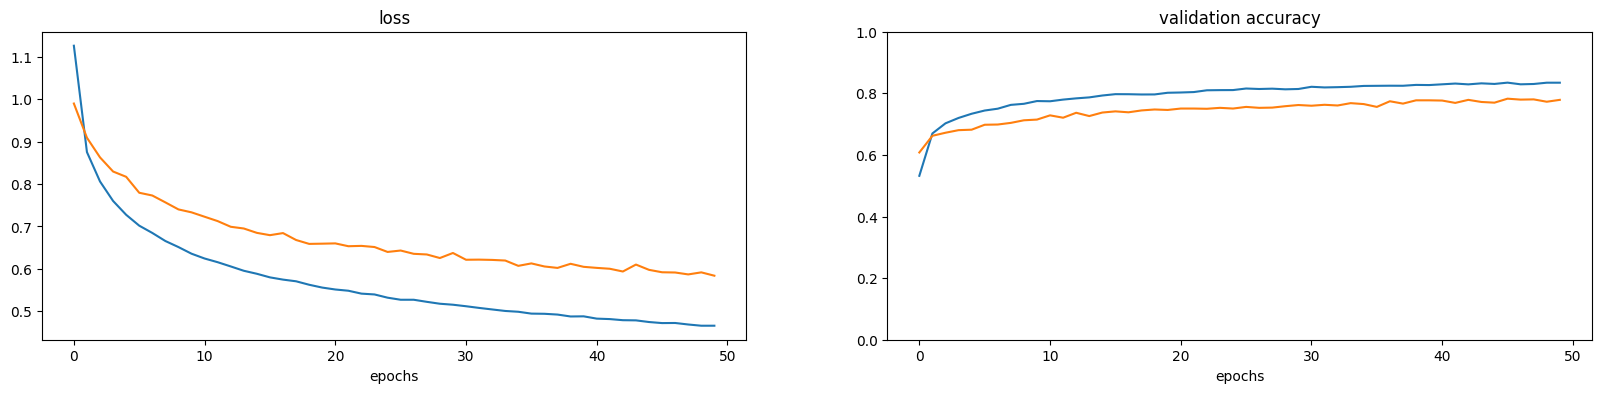

In [30]:
fig = plt.figure(figsize=(20,4))
ax = fig.add_subplot(121)
ax.plot(history3.history["loss"])
ax.plot(history3.history["val_loss"])
ax.set_title("loss")
ax.set_xlabel("epochs")

ax2 = fig.add_subplot(122)
ax2.plot(history3.history["accuracy"])
ax2.plot(history3.history["val_accuracy"])
ax2.set_title("validation accuracy")
ax2.set_xlabel("epochs")
ax2.set_ylim(0, 1)

plt.show()

In [36]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

vgg = VGG16(weights='imagenet', include_top=True)
vgg.summary()

553467096/553467096 [==============================] - 35s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [37]:
# make a reference to VGG's input layer
inp = vgg.input

# make a new softmax layer with num_classes neurons
new_classification_layer = Dense(num_classes, activation='softmax')

# connect our new layer to the second to last layer in VGG, and make a reference to it
out = new_classification_layer(vgg.layers[-2].output)

# create a new network between inp and out
model_vgg = Model(inp, out)

In [38]:
# make all layers untrainable by freezing weights (except for last layer)
for l, layer in enumerate(model_vgg.layers[:-1]):
    layer.trainable = False

# ensure the last layer is trainable/not frozen
for l, layer in enumerate(model_vgg.layers[-1:]):
    layer.trainable = True

model_vgg.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_vgg.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
history4 = model_vgg.fit(X_train, to_categorical(train_encoded_labels, num_classes=num_classes),
                         batch_size=64,
                         epochs=5,
                         validation_data=(X_test,to_categorical(test_encoded_labels, num_classes=num_classes)))

Epoch 1/5
